# Probability Density

Elements of Data Science

by [Allen Downey](https://allendowney.com)

[MIT License](https://opensource.org/licenses/MIT)

In [1]:
# If we're running on Colab, install empiricaldist
# https://pypi.org/project/empiricaldist/

import sys
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    !pip install empiricaldist

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from empiricaldist import Pmf, Cdf

## Probability density

Probability density is a difficult concept.  I think this video does a nice job introducing the idea from a mathematical perspective:

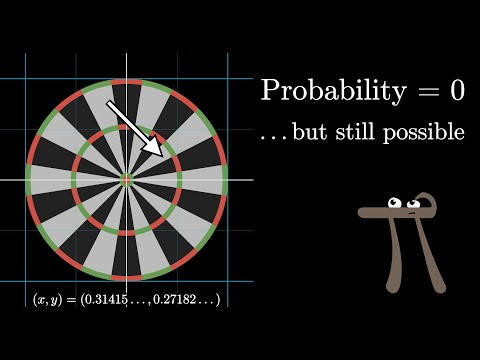

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZA4JkHKZM50')

To make some of the ideas in the video more concrete, I will show how probability density comes up when we work with data.

As an example, I'll create a `norm` object that represents a normal distribution with mean `0` and standard deviation `0.1`.

In [4]:
from scipy.stats import norm

dist = norm(0, 0.1)

And use it to draw a sample of 100 values.

In [5]:
sample = dist.rvs(100)
sample.mean(), sample.std()

(-0.0074843179123803925, 0.09452438765067664)

If we plot the CDF of the sample and compare it to the analytic CDF of the normal distribution, it agrees pretty well.

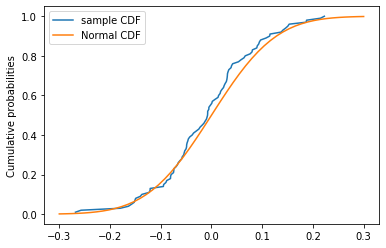

In [6]:
cdf = Cdf.from_seq(sample)
cdf.plot(label='sample CDF')

xs = np.linspace(-0.3, 0.3)
ps = dist.cdf(xs)
plt.plot(xs, ps, label='Normal CDF')

plt.ylabel('Cumulative probabilities')
plt.legend();

In this example, we know that the sample was drawn from this distribution, so it's not surprising that they agree.

But if this dataset came from real-world measurements, we could use this figure to show that the normal distribution is a good model for this data.

However, if we do the same thing with the PMF and compare it to the analytic PDF of the normal distribution, it doesn't agree at all!

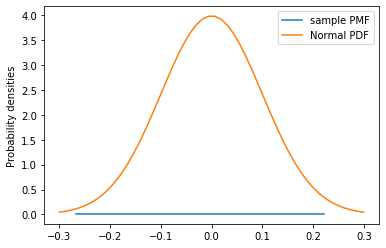

In [7]:
pmf = Pmf.from_seq(sample)
pmf.plot(label='sample PMF')

xs = np.linspace(-0.3, 0.3)
ps = dist.pdf(xs)
plt.plot(xs, ps, label='Normal PDF')

plt.ylabel('Probability densities')
plt.legend();

There are two problems with what we tried to do here:

1. The values in the random sample are floating-point numbers, so it's unlikely the same value was chosen more than once.  If each value appears 1/100 times, the probability mass is 0.01 for all of them.

2. The values from the PDF are not probability masses; they are probability densities.  That's why some of them are greater than 1 (which is impossible for probabilities), and why it doesn't make sense to compare them to a PMF.

If you want to compare the distribution of a sample to a normal distribution, there are two options.

1. Use CDFs.

2. Use KDE.

KDE stands for "Kernel Density Estimation".  The idea is that it uses the sample to estimate a PDF the sample could have been drawn from.

Here's how we can use it.

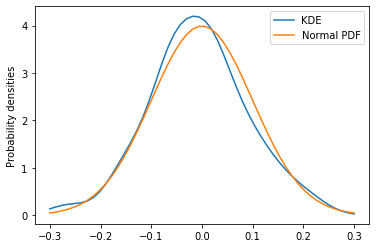

In [8]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(sample).evaluate(xs)
plt.plot(xs, kde, label='KDE')

xs = np.linspace(-0.3, 0.3)
ps = dist.pdf(xs)
plt.plot(xs, ps, label='Normal PDF')

plt.ylabel('Probability densities')
plt.legend();

The agreement between the KDE and the analytic PDF of the normal distribution is pretty good.  So if this dataset came from real-world measurements, we could use a figure like this to show that the normal distribution is a good model for the data. 

So which figure should you use, CDF or KDE?

I think the CDF provides a clearer picture of the two distributions and where they differ.

Also, KDE depends on assumptions about the smoothness of the distribution.  It has a parameter you can tune, but it's not clear what value you should use for making this kind of comparison.

However, PDFs are more familiar to most people, so they might be a good choice for some audiences.